# Notebook to produce final results from the quarter 1 report
Due to having unresolved issues with code not working in the terminal, but working in a Jupyter notebook, this notebook is used as a substitute for a run.py file. 

Downloading...
From: https://drive.google.com/uc?id=13Xug1PoJ3bl3Ya9MTM0p-AR513mtsIVR
To: /home/dson/dsc_capstone_q1/src/visualization/sac_checkpoint_cheetah_123456_10000
100%|██████████| 3.22M/3.22M [00:00<00:00, 76.2MB/s]


Loading models from /home/dson/dsc_capstone_q1/src/model/content/sac_checkpoint_cheetah_123456_10000
Episode: 0 Reward: 917.3242029752582
Episode: 1 Reward: 915.493750391528
Episode: 2 Reward: 911.6674706190825
Episode: 3 Reward: 912.1822360213846
Episode: 4 Reward: 919.6375821083784
Episode: 5 Reward: 915.8287189565599
Episode: 6 Reward: 912.9765100516379
Episode: 7 Reward: 919.5668813679367
Episode: 8 Reward: 921.2015081662685
Episode: 9 Reward: 920.64966965653


/home/dson/dsc_capstone_q1/src/visualization/visualize.py:84: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_b = pd.DataFrame(figure_5b).drop_duplicates().pivot('kinematic_feature', 'activation', 'cka')


<AxesSubplot:xlabel='activation', ylabel='kinematic_feature'>

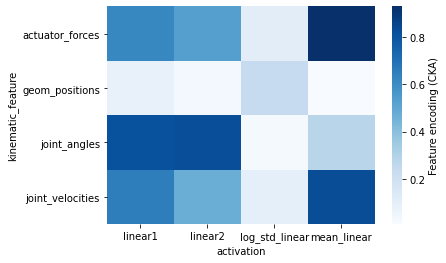

In [1]:
from visualize import plot_cka_kinematics

%matplotlib inline
plot_cka_kinematics()

/home/dson/dsc_capstone_q1/src/visualization/visualize.py:110: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_c = pd.DataFrame(figure_5c).pivot('activation_1', 'activation_2', 'cka')


<AxesSubplot:xlabel='activation_2', ylabel='activation_1'>

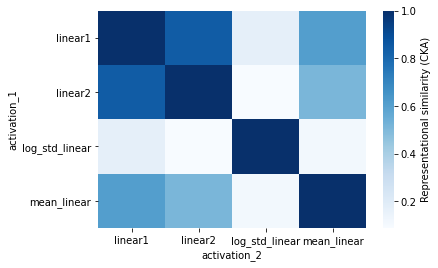

In [2]:
from visualize import plot_cka_activations

%matplotlib inline
plot_cka_activations()

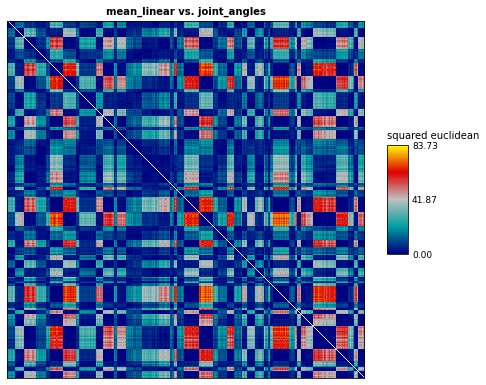

In [4]:
from visualize import plot_rsa
# from function documentation
# plot rsa similarity between kinematic feature and activation layer
# plot_rsa(activation, kinematic)
# activation: 'mean_linear', 'log_std_linear'
# kinematic: 'joint_angles', 'joint_velocities', 'actuator_forces'


%matplotlib inline
plot_rsa('mean_linear', 'joint_angles')